# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
import os
os.chdir('F:/f/MY____/AAIC/AssignmentS/2DonarChoose/Assignments_DonorsChoose_2018')
os.getcwd()

'F:\\f\\MY____\\AAIC\\AssignmentS\\2DonarChoose\\Assignments_DonorsChoose_2018'

In [33]:
from tqdm import tqdm
for i in tqdm(range(int(10e6))):
    pass

100%|█████████████████████████████████████████████████████████████████| 10000000/10000000 [00:05<00:00, 1969588.27it/s]


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Anvesh\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [4]:
project_data = pd.read_csv('train_data.csv', nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
print(type(project_data))
print(type(resource_data))

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
print("Number of data Points in Resources Data ",resource_data.shape)
print("-"*50)
print("The Features of resources data ", resource_data.columns.values)

Number of data Points in Resources Data  (1541272, 4)
--------------------------------------------------
The Features of resources data  ['id' 'description' 'quantity' 'price']


In [8]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [9]:
categories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
#print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
#from tqdm import tqdm
#preprocessed_essays = []
## tqdm is for printing the status bar
#for sentance in tqdm(project_data['essay'].values):
#    sent = decontracted(sentance)
#    sent = sent.replace('\\r', ' ')
#    sent = sent.replace('\\"', ' ')
#    sent = sent.replace('\\n', ' ')
#    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
#    # https://gist.github.com/sebleier/554280
#    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
#    preprocessed_essays.append(sent.lower().strip())

In [19]:
# after preprocesing
#preprocessed_essays[20000]

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [ ]:
#sent = decontracted(project_data['project_title'].values[12])
#print(sent)

In [ ]:
# similarly you can preprocess the titles also
#from tqdm import tqdm
#preprocessed_titles = []
## tqdm is for printing the status bar
#for sentance in tqdm(project_data['project_title'].values):
#    sent = decontracted(sentance)
#    sent = sent.replace('\\r', ' ')
#    sent = sent.replace('\\"', ' ')
#    sent = sent.replace('\\n', ' ')
#    sent = re.sub('[b^A-Za-z0-9]+', ' ', sent)
#    # https://gist.github.com/sebleier/554280
#    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
#    preprocessed_titles.append(sent.lower().strip())

## 1.5 Preparing data for models

## Train_Test_Split

In [19]:
#Splitting Data into train and Test sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(project_data, 
                                                    project_data["project_is_approved"],
                                                    test_size = 0.33, stratify = project_data["project_is_approved"], random_state = 42)

In [20]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train,
                                                test_size = 0.33, stratify = y_train, random_state = 42)

In [21]:
print(x_test.columns)
print(x_train.columns)
#print(x_cv.columns)
#print(x_train.shape)
#print(x_test.shape)
#print(x_cv.shape)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')


In [22]:
#https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe-by-column-name
#x_train = 
x_train.drop(["project_is_approved"], axis = 1, inplace = True) 
#x_test = 
x_test.drop(["project_is_approved"], axis = 1, inplace = True) 
#x_cv = 
x_cv.drop(["project_is_approved"], axis = 1, inplace = True) 


In [23]:
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay'],
      dtype='object')


In [24]:
print(x_train['essay'].values[0])

First grade rocks! My students come into the room each morning with smiles on their faces and an eagerness to learn! They are excited about school and they make my job fun.\r\n\r\nMy students inspire me daily to be the best teacher I can be for them. They work hard and they play hard. They deserve an amazing educational experience!\r\n\r\nOur school is a Title I school, with over 75% of students receiving free or reduced-price lunch. Many of them come from homes where their parents work hard to make ends meet and take care of basic needs. Luxuries and extras are few and far between, so school is a place where they can experience things that are out-of-reach at home.Technology is a fabulous motivator in the classroom! My students get excited whenever technology is added to a lesson or activity. They love the hands-on aspect and enjoy branching out and trying something new.\r\n\r\nThe use of technology in lessons and activities assists me in reaching the different types of learners in my

In [25]:
sent = decontracted(x_train['essay'].values[2000])
print(sent)
print("="*50)

I am a special education teacher with 20 years of experience, however, I still need help providing for my students what they need.  My classroom has students who come in and out all day long.  I work with 26 students throughout the day with Learning Disabilities,  Intellectual Disabilities, Other Health Impairments, ADD/ADHD, and Speech and Language Impairments.  The materials I am requesting will help my students (who need to work on developing their independent work skills) increase their academic skills by providing activities that are on their individual level, self-paced and self-checking.I am requesting these materials to provide my students with opportunities to improve their academic abilities through independent learning.  I work with small groups of students who need extra help in reading, writing, and/or math.  When students are with me, I strive to make the best use of every minute we have together by keeping them engaged and learning.  Many of my students struggle to compl

## Preprocessing Train Data

In [26]:
# Preprocessing Train Data of Project Essays

from tqdm import tqdm
train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    train_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:20<00:00, 1108.68it/s]


In [27]:
train_preprocessed_essays[10]

'students naturally inquisitive respectful innate concern others community well outside community 90 love read fun exploring new genres within classroom connect thematic elements text outside world oftentimes bring new item piece information pertaining unit time brilliant give hope future area state country running place another 20 30 years vital nurture naturally inquisitive minds fullest extent possible help student learning skyrocket tools engage formative assessment students use markers erasers individual lapboards provide feedback answers questions posed reviewed content also use review games planning group collaboration inferences within text reading teacher complete view grasped material not mobile organizer used organize markers erasers pencils glue classwork better organization ensure class runs smoothly kids teacher stay focused instruction time higher quality nannan'

In [28]:
#Preprocessing Test Data of Project Essays

# Combining all the above stundents 
from tqdm import tqdm
test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    test_preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:16<00:00, 974.18it/s]


In [34]:
test_preprocessed_essays[10]

'elementary school beautifully old building 91 years old houses many classrooms ranging kindergarten fifth grade home full adults children love learn new students joining family year kindergarteners students enter classroom year excited nervous unaware fun magic awaits start academic journey many entering school first time students come backgrounds deserving love endless opportunites love discovering ways guided encouraged become independent take ownership learning studies show music vital part learning certain areas brain activated music help many different types learners classroom students feel inspired songs carefully choose match theme learn active means healthy happy dance fun beats favorite songs not help sing dance along lighting fire learning many different types learners good majority find music great way help remember things somewhat tedious parts day clean become exciting tidy beat music slow fast kindergarten also creating things whether tea party set ready serve dramatic p

In [35]:
#Preprocessing Cross Validation Data  of Project Essays

# Combining all the above stundents 
from tqdm import tqdm
cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    cv_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:09<00:00, 1107.67it/s]


In [36]:
cv_preprocessed_essays[10]

'students great time using bright colorful glazes expensive not afford please help us get basic colors finish project help us purchase tools create beautiful works art many first experience fine arts clay high school mix cultures socioeconomic backgrounds students not speak much english still create clay projects also students learning disabilities ceramics classes school currently california distinguished school teachers students proud hard work one first projects students make clay introduced coil building technique well introduced making repeated patterns clay shapes students create original pot shows unique personality ideas learn many artists art elements principles well learn basic ceramic building techniques influenced anything around pop culture artists even disney movies influences lives project use common core state visual arts standards also paint patterned pots bright vivid glaze colors make designs choose stand look complete students need coil extruder tool help create coi

## Preprocessing Project Titles

In [37]:
#Preprocessing Train Data for Project Titles
from tqdm import tqdm
train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    train_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 17524.24it/s]


In [38]:
train_preprocessed_titles[10]

'show work student lap board markers organizer'

In [39]:
#Preprocessing Test Data for Project Titles
from tqdm import tqdm
test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    test_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 23275.89it/s]


In [40]:
test_preprocessed_titles[10]

'need make music capture memories'

In [41]:
#Preprocessing CV Data for Project Titles
from tqdm import tqdm
cv_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    cv_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 23726.90it/s]


In [42]:
cv_preprocessed_titles[10]

'creative coil pottery'

In [43]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [44]:
# we use count vectorizer to convert the values into one 
# Vectorizing Clean Categories 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer.fit(x_train['clean_categories'].values)
train_categories_one_hot = vectorizer.transform(x_train['clean_categories'].values)
test_categories_one_hot = vectorizer.transform(x_test['clean_categories'].values)
cv_categories_one_hot = vectorizer.transform(x_cv['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of  Train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of  Test matrix after one hot encodig ",test_categories_one_hot.shape)
print("Shape of  cv  matrix after one hot encodig ",cv_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of  Train matrix after one hot encodig  (22445, 9)
Shape of  Test matrix after one hot encodig  (16500, 9)
Shape of  cv  matrix after one hot encodig  (11055, 9)


In [45]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train["clean_subcategories"].values)
train_sub_categories_one_hot = vectorizer.transform(x_train['clean_subcategories'].values)
test_sub_categories_one_hot = vectorizer.transform(x_test['clean_subcategories'].values)
cv_sub_categories_one_hot = vectorizer.transform(x_cv['clean_subcategories'].values)

print(vectorizer.get_feature_names())
print("Shape of Train matrix after  Trainone hot encodig ",train_sub_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_sub_categories_one_hot.shape)
print("Shape of cv_ matrix after  one hot encodig ",cv_sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of Train matrix after  Trainone hot encodig  (22445, 30)
Shape of test matrix after one hot encodig  (16500, 30)
Shape of cv_ matrix after  one hot encodig  (11055, 30)


In [46]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
from collections import Counter
my_counter = Counter()
for word in project_data["school_state"].values:
    my_counter.update(word.split())

In [47]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_cat_dict = dict(my_counter)
storted_state_cat_dict = dict(sorted(state_cat_dict.items(), key=lambda kv: kv[1]))


In [48]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
#Using Count Vectorizer to convert the state value onto on hot encoded feature
vectorizer = CountVectorizer(vocabulary=list(storted_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


train_state_one_hot = vectorizer.transform(x_train['school_state'].values)
test_state_one_hot = vectorizer.transform(x_test['school_state'].values)
cv_state_one_hot = vectorizer.transform(x_cv['school_state'].values)

print("Shape of Train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_state_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'CT', 'TN', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of Train matrix after one hot encodig  (22445, 51)
Shape of Test matrix after one hot encodig  (16500, 51)
Shape of CV matrix after one hot encodig  (11055, 51)


In [49]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['project_grade_category']=project_data['project_grade_category'].fillna("")
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

In [50]:
project_cat_dict = dict(my_counter)
sorted_project_cat_dict = dict(sorted(project_cat_dict.items(), key=lambda kv: kv[1]))

In [51]:
# feature encoding for project_grade_category also
vectorizer = CountVectorizer(vocabulary=list(sorted_project_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

train_grade_one_hot = vectorizer.transform(x_train['project_grade_category'].values)
test_grade_one_hot = vectorizer.transform(x_test['project_grade_category'].values)
cv_grade_one_hot = vectorizer.transform(x_cv['project_grade_category'].values)

print("Shape of Train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_grade_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",cv_grade_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of Train matrix after one hot encodig  (22445, 5)
Shape of test matrix after one hot encodig  (16500, 5)
Shape of cv matrix after one hot encodig  (11055, 5)


In [52]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna(" ")

In [53]:

my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

In [54]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_cat_dict = dict(my_counter)
sorted_teacher_cat_dict = dict(sorted(teacher_cat_dict.items(), key=lambda kv: kv[1]))

In [55]:
#Using Count Vectorizer to convert the teacher_prefix value onto on hot encoded feature
#ValueError: np.nan is an invalid document, expected byte or unicode string.
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())

train_teacher_one_hot = vectorizer.transform(x_train['teacher_prefix'].values.astype('U'))
test_teacher_one_hot = vectorizer.transform(x_test['teacher_prefix'].values.astype('U'))
cv_teacher_one_hot = vectorizer.transform(x_cv['teacher_prefix'].values.astype('U'))

print("Shape of Train matrix after one hot encodig ",train_teacher_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_teacher_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_teacher_one_hot.shape)


['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of Train matrix after one hot encodig  (22445, 5)
Shape of Test matrix after one hot encodig  (16500, 5)
Shape of CV matrix after one hot encodig  (11055, 5)


## 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words Project Essays

In [56]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays)

train_text_bow = vectorizer.transform(train_preprocessed_essays)
print("Shape of matrix after one hot encodig ",train_text_bow.shape)

Shape of matrix after one hot encodig  (22445, 8772)


In [57]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

test_text_bow = vectorizer.transform(test_preprocessed_essays)
print("Shape of matrix after one hot encodig ",test_text_bow.shape)

Shape of matrix after one hot encodig  (16500, 8772)


In [58]:
# Vectrozing Cv
cv_text_bow = vectorizer.transform(cv_preprocessed_essays)
print("Shape of matrix after one hot encodig ",cv_text_bow.shape)


Shape of matrix after one hot encodig  (11055, 8772)


#### Project Titles

In [59]:
vectorizer.fit(train_preprocessed_titles)
train_title_bow = vectorizer.fit_transform(train_preprocessed_titles)
print("Shape of matrix after one hot encodig ",train_title_bow.shape)

Shape of matrix after one hot encodig  (22445, 1151)


In [60]:
test_title_bow = vectorizer.transform(test_preprocessed_titles)
print("Shape of matrix after one hot encodig ",test_title_bow.shape)

Shape of matrix after one hot encodig  (16500, 1151)


In [61]:
cv_title_bow = vectorizer.transform(cv_preprocessed_titles)
print("Shape of matrix after one hot encodig ",cv_title_bow.shape)

Shape of matrix after one hot encodig  (11055, 1151)


#### 1.5.2.2 TFIDF vectorizer Project Essays

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays)

train_text_tfidf = vectorizer.transform(train_preprocessed_essays)
print("Shape of matrix after one hot encodig ",train_text_tfidf.shape)

Shape of matrix after one hot encodig  (22445, 8772)


In [63]:

test_text_tfidf = vectorizer.transform(test_preprocessed_essays)
print("Shape of matrix after one hot encodig ",test_text_tfidf.shape)

Shape of matrix after one hot encodig  (16500, 8772)


In [64]:

cv_text_tfidf = vectorizer.transform(cv_preprocessed_essays)
print("Shape of matrix after one hot encodig ",cv_text_tfidf.shape)

Shape of matrix after one hot encodig  (11055, 8772)


#### Project Titles

In [65]:

vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_titles)

train_title_tfidf = vectorizer.transform(train_preprocessed_titles)
print("Shape of matrix after one hot encodig ",train_title_tfidf.shape)

Shape of matrix after one hot encodig  (22445, 1151)


In [66]:
test_title_tfidf = vectorizer.transform(test_preprocessed_titles)
print("Shape of matrix after one hot encodig ",test_title_tfidf.shape)

Shape of matrix after one hot encodig  (16500, 1151)


In [67]:
cv_title_tfidf = vectorizer.transform(cv_preprocessed_titles)
print("Shape of matrix after one hot encodig ",cv_title_tfidf.shape)

Shape of matrix after one hot encodig  (11055, 1151)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [68]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [69]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [70]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

print(len(train_avg_w2v_vectors))
print(len(train_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:11<00:00, 1889.61it/s]


22445
300


In [71]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 2004.20it/s]


16500
300


In [72]:
# average Word2Vec
# compute average word2vec for each review.
cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:05<00:00, 1911.94it/s]


11055
300


#### Projects Titles

In [73]:
# average Word2Vec
# compute average word2vec for each review.
train_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_title_avg_w2v_vectors.append(vector)

print(len(train_title_avg_w2v_vectors))
print(len(train_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 38570.20it/s]


22445
300


In [74]:
# average Word2Vec
# compute average word2vec for each review.
test_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_title_avg_w2v_vectors.append(vector)

print(len(test_title_avg_w2v_vectors))
print(len(test_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 39105.76it/s]


16500
300


In [75]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_title_avg_w2v_vectors.append(vector)

print(len(cv_title_avg_w2v_vectors))
print(len(cv_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 34020.60it/s]


11055
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [76]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
# average Word2Vec
# compute average word2vec for each review.
train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_essay_tfidf_w2v_vectors.append(vector)

print(len(train_essay_tfidf_w2v_vectors))
print(len(train_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:23<00:00, 269.84it/s]


22445
300


In [78]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_essay_tfidf_w2v_vectors.append(vector)

print(len(test_essay_tfidf_w2v_vectors))
print(len(test_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:01<00:00, 266.51it/s]


16500
300


In [79]:
# average Word2Vec
# compute average word2vec for each review.
cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_essay_tfidf_w2v_vectors.append(vector)

print(len(cv_essay_tfidf_w2v_vectors))
print(len(cv_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:43<00:00, 278.29it/s]


11055
300


#### Project Titles

In [80]:
# average Word2Vec
# compute average word2vec for each review.
train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_title_tfidf_w2v_vectors.append(vector)

print(len(train_title_tfidf_w2v_vectors))
print(len(train_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 17201.95it/s]


22445
300


In [81]:
# average Word2Vec
# compute average word2vec for each review.
test_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_title_tfidf_w2v_vectors.append(vector)

print(len(test_title_tfidf_w2v_vectors))
print(len(test_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 16147.70it/s]


16500
300


In [82]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_title_tfidf_w2v_vectors.append(vector)

print(len(cv_title_tfidf_w2v_vectors))
print(len(cv_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 15250.62it/s]


11055
300


### 1.5.3 Vectorizing Numerical features

In [83]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(price_data.head())
#print(project_data.columns)
print(x_train.columns)


        id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay'],
      dtype='object')


In [84]:
#   - quantity : numerical (optinal)
#   - teacher_number_of_previously_posted_projects : numerical
#   - price : numerical
x_train = pd.merge(x_train, price_data, on = "id", how = "left")
#print(x_train.columns)
x_test = pd.merge(x_test, price_data, on = "id", how = "left")
x_cv = pd.merge(x_cv, price_data, on = "id", how = "left")

#### Standardize Price

In [85]:
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
#https://stackoverflow.com/questions/37716699/how-to-hstack-several-sparse-matrices-feature-matrices
#https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
#x_train = x_train['price'].as_matrix().astype(np.float)
#x_train = x_train.fillna(x_train.mean())

In [86]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()

price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_price_standar = price_scalar.transform(x_train['price'].values.reshape(-1, 1))
train_price_standar

Mean : 297.71562753397194, Standard deviation : 373.5890845438879


array([[-0.37665883],
       [-0.77008574],
       [-0.61491526],
       ...,
       [-0.44617371],
       [-0.58967362],
       [-0.12881968]])

In [87]:
price_scalar.fit(x_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
test_price_standar = price_scalar.transform(x_test['price'].values.reshape(-1, 1))
test_price_standar

Mean : 301.40470666666664, Standard deviation : 387.6948484063583


array([[ 0.09227694],
       [-0.54660181],
       [-0.00364902],
       ...,
       [ 1.88484654],
       [-0.32495842],
       [-0.45085641]])

In [88]:
price_scalar.fit(x_cv['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_price_standar = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))
test_price_standar

Mean : 299.52771506105836, Standard deviation : 373.1478347400019


array([[ 0.09227694],
       [-0.54660181],
       [-0.00364902],
       ...,
       [ 1.88484654],
       [-0.32495842],
       [-0.45085641]])

In [89]:
print(train_price_standar.shape, y_train.shape)
print(test_price_standar.shape, y_test.shape)
print(cv_price_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


#### Standardize Teacher previously posted Projects

In [90]:

warnings.filterwarnings("ignore")
price_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_prev_proj_standar = price_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
train_prev_proj_standar 

Mean : 11.66473602138561, Standard deviation : 29.394684894505467


array([[ 0.75984022],
       [-0.22673269],
       [-0.32879196],
       ...,
       [-0.36281171],
       [-0.32879196],
       [-0.32879196]])

In [91]:
price_scalar.fit(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
test_prev_proj_standar = price_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
test_prev_proj_standar

Mean : 10.824363636363636, Standard deviation : 26.94848396907338


array([[-0.40166874],
       [-0.3645609 ],
       [-0.40166874],
       ...,
       [ 0.22916452],
       [-0.17902171],
       [-0.40166874]])

In [92]:
price_scalar.fit(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_prev_proj_standar = price_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
cv_prev_proj_standar

Mean : 11.040253279059248, Standard deviation : 27.32928192601594


array([[ 0.58397973],
       [-0.33079   ],
       [-0.36738079],
       ...,
       [-0.36738079],
       [-0.29419921],
       [ 0.14489026]])

In [93]:
print(train_prev_proj_standar.shape, y_train.shape)
print(test_prev_proj_standar.shape, y_test.shape)
print(cv_prev_proj_standar.shape, y_cv.shape)


(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


#### Standardize Quantity

In [94]:
price_scalar.fit(x_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_quantity_standar = price_scalar.transform(x_train['quantity'].values.reshape(-1, 1))
train_quantity_standar 

Mean : 17.001470260637113, Standard deviation : 26.03701886058425


array([[-0.57615929],
       [ 0.1151641 ],
       [-0.26890445],
       ...,
       [-0.49934558],
       [-0.19209074],
       [-0.26890445]])

In [95]:
price_scalar.fit(x_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
test_quantity_standar = price_scalar.transform(x_test['quantity'].values.reshape(-1, 1))
test_quantity_standar

Mean : 17.05290909090909, Standard deviation : 27.494020077501187


array([[ 4.32628952],
       [-0.40201139],
       [-0.51112602],
       ...,
       [ 0.17993334],
       [-0.58386911],
       [-0.43838293]])

In [96]:
price_scalar.fit(x_cv['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_quantity_standar = price_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))
cv_quantity_standar

Mean : 17.173224785165083, Standard deviation : 27.30705061932881


array([[ 1.27537667],
       [-0.04296417],
       [-0.5190317 ],
       ...,
       [-0.44579054],
       [ 0.39648278],
       [ 0.03027699]])

In [97]:
print(train_quantity_standar.shape, y_train.shape)
print(test_quantity_standar.shape, y_test.shape)
print(cv_quantity_standar.shape, y_cv.shape)


(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [98]:
#Categorical
print("Shape of Train matrix after  Trainone hot encodig ",train_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_categories_one_hot.shape)
print("Shape of cv_ matrix after  one hot encodig ",cv_categories_one_hot.shape)


Shape of Train matrix after  Trainone hot encodig  (22445, 9)
Shape of test matrix after one hot encodig  (16500, 9)
Shape of cv_ matrix after  one hot encodig  (11055, 9)


In [99]:
#subcategorical
print("Shape of Train matrix after  Trainone hot encodig ",train_sub_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_sub_categories_one_hot.shape)
print("Shape of cv_ matrix after  one hot encodig ",cv_sub_categories_one_hot.shape)

Shape of Train matrix after  Trainone hot encodig  (22445, 30)
Shape of test matrix after one hot encodig  (16500, 30)
Shape of cv_ matrix after  one hot encodig  (11055, 30)


In [100]:
#State
print("Shape of Train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_state_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_state_one_hot.shape)

Shape of Train matrix after one hot encodig  (22445, 51)
Shape of Test matrix after one hot encodig  (16500, 51)
Shape of CV matrix after one hot encodig  (11055, 51)


In [101]:
#Grade
print("Shape of Train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_grade_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",cv_grade_one_hot.shape)

Shape of Train matrix after one hot encodig  (22445, 5)
Shape of test matrix after one hot encodig  (16500, 5)
Shape of cv matrix after one hot encodig  (11055, 5)


In [102]:
#Teacher
print("Shape of Train matrix after one hot encodig ",train_teacher_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_teacher_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_teacher_one_hot.shape)

Shape of Train matrix after one hot encodig  (22445, 5)
Shape of Test matrix after one hot encodig  (16500, 5)
Shape of CV matrix after one hot encodig  (11055, 5)


In [103]:
#BOW Project Essays
print("Shape of train matrix after one hot encodig ",train_text_bow.shape)
print("Shape of test  matrix after one hot encodig ",test_text_bow.shape)
print("Shape of cv matrix after one hot encodig ",cv_text_bow.shape)
print("- "*50)
#BOW Project Titles
print("Shape of train matrix after one hot encodig ",train_title_bow.shape)
print("Shape of test matrix after one hot encodig ",test_title_bow.shape)
print("Shape of cv matrix after one hot encodig ",cv_title_bow.shape)

Shape of train matrix after one hot encodig  (22445, 8772)
Shape of test  matrix after one hot encodig  (16500, 8772)
Shape of cv matrix after one hot encodig  (11055, 8772)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Shape of train matrix after one hot encodig  (22445, 1151)
Shape of test matrix after one hot encodig  (16500, 1151)
Shape of cv matrix after one hot encodig  (11055, 1151)


In [104]:
#TFIDF Project Essays
print("Shape of train matrix after one hot encodig ",train_text_tfidf.shape)
print("Shape of test matrix after one hot encodig ",test_text_tfidf.shape)
print("Shape of cv matrix after one hot encodig ",cv_text_tfidf.shape)
print("- "*50)
#TFIDF Project Title

print("Shape of train matrix after one hot encodig ",train_title_tfidf.shape)
print("Shape of matrix after one hot encodig ",test_title_tfidf.shape)
print("Shape of matrix after one hot encodig ",cv_title_tfidf.shape)


Shape of train matrix after one hot encodig  (22445, 8772)
Shape of test matrix after one hot encodig  (16500, 8772)
Shape of cv matrix after one hot encodig  (11055, 8772)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Shape of train matrix after one hot encodig  (22445, 1151)
Shape of matrix after one hot encodig  (16500, 1151)
Shape of matrix after one hot encodig  (11055, 1151)


In [105]:
from scipy.sparse import hstack

In [106]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#TypeError: 'coo_matrix' object is not subscriptable https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train1 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot,train_text_bow, train_title_bow, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1))

(22445, 10026) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [107]:
#X_trainn = X_train.todense() #NOT Working

In [108]:
X_test1 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_text_bow, test_title_bow, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1))

(16500, 10026) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [109]:
X_cv1 = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot, cv_text_bow, cv_title_bow, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1))

(11055, 10026) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [110]:
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=50)
#knn.fit(X_train, y_train)
#pred1 = knn.predict(X_test)

In [111]:

#pred = knn.predict(X_test)
#accuracy_score(y_test, pred)

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

## 2.4.1 Applying KNN brute force on BOW_SET-1

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=50)
#knn.fit(X_train, y_train)
#pred1 = knn.predict(X_test)

In [162]:
print(X_train1.shape, y_train.shape)
print(X_test1.shape, y_test.shape)
print(X_cv1.shape, y_cv.shape)

(22445, 10026) (22445,)
(16500, 10026) (16500,)
(11055, 10026) (11055,)


In [113]:
#myList = list(range(1,50))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
#cv_scores = []

# perform 10-fold cross validation
#for k in neighbors:
#   knn = KNeighborsClassifier(n_neighbors=k)
#    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')#
#    cv_scores.append(scores.mean())

In [114]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [15:05<00:00, 94.01s/it]


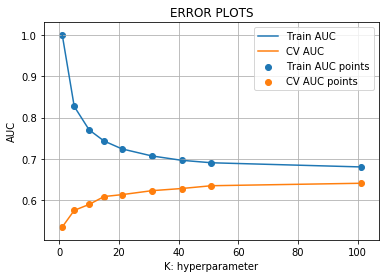

In [115]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train1, y_train)

    y_train_pred = batch_predict(neigh, X_train1)    
    y_cv_pred = batch_predict(neigh, X_cv1)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Grid Search

In [137]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#from sklearn.model_selection import GridSearchCV
#neigh = KNeighborsClassifier()
#parameters = {'n_neighbors':[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 107, 121]}
#clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')
#clf.fit(X_train1, y_train)

#train_auc= clf.cv_results_['mean_train_score']
#train_auc_std= clf.cv_results_['std_train_score']
#cv_auc = clf.cv_results_['mean_test_score'] 
#cv_auc_std= clf.cv_results_['std_test_score']

#plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
## this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

#plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
## this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

#plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
#plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')
#plt.legend()
#plt.xlabel("K: hyperparameter")
#plt.ylabel("AUC")
#plt.title("ERROR PLOTS")
#plt.grid()
#plt.show()

## Fitting Model to Hyper-Parameter Curve

<b>TO Reduce the noise in the Pridcting Values Here we are Picking the Highest k Values </b>


In [116]:
best_k_1 = 97
print(X_test1.shape)

(16500, 10026)


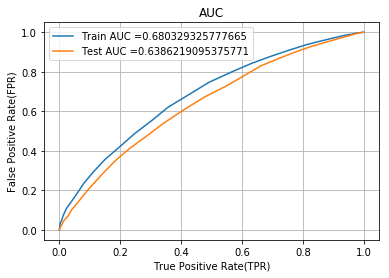

In [117]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_1)
neigh.fit(X_train1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train1)    
y_test_pred = batch_predict(neigh, X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



In [118]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion Matrix

In [120]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24992242983850813 for threshold 0.773
[[ 1762  1701]
 [ 4817 14165]]


the maximum value of tpr*(1-fpr) 0.24992242983850813 for threshold 0.773


Text(0.5,1,'Train Confusion Matix')

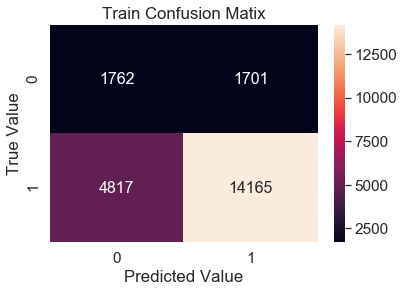

In [130]:
#How to print confusion matrix using Heat map
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://tatwan.github.io/How-To-Plot-A-Confusion-Matrix-In-Python/
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds,
                                                                      train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

### Test Data

In [131]:
#This is Future Unseen Data
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24946298400090341 for threshold 0.794
[[1508 1038]
 [5496 8458]]


the maximum value of tpr*(1-fpr) 0.24946298400090341 for threshold 0.794


Text(0.5,1,'Test Confusion Matix')

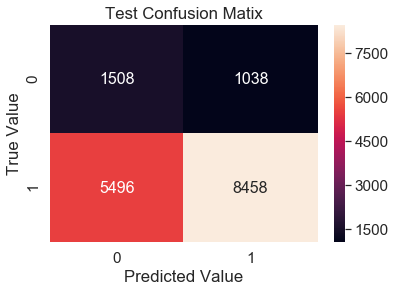

In [133]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## 2.4.2 Applying KNN brute force on TFIDF_SET-2

In [135]:
X_train2 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot,train_text_tfidf, train_title_tfidf, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar)).tocsr()
X_test2 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_text_tfidf, test_title_tfidf, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar)).tocsr()
X_cv2 = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot, cv_text_tfidf, cv_title_tfidf, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar)).tocsr()
print(X_train2.shape, y_train.shape)
print(X_test2.shape, y_test.shape)
print(X_cv2.shape, y_cv.shape)

(22445, 10026) (22445,)
(16500, 10026) (16500,)
(11055, 10026) (11055,)


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [15:40<00:00, 102.80s/it]


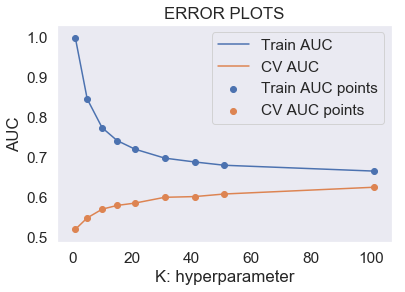

In [136]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train2, y_train)

    y_train_pred = batch_predict(neigh, X_train2)    
    y_cv_pred = batch_predict(neigh, X_cv2)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Fitting Model to Hyperparameter Curve

In [137]:
best_k_2 = 107
# The Highest value of K can neglect the noise and outliers

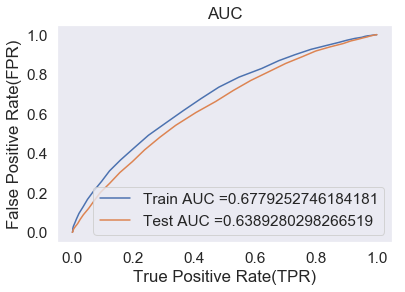

In [138]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_2)
neigh.fit(X_train1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train1)    
y_test_pred = batch_predict(neigh, X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



### Confusion Matix

In [139]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2496422516685402 for threshold 0.776
[[ 1797  1666]
 [ 5043 13939]]


the maximum value of tpr*(1-fpr) 0.2496422516685402 for threshold 0.776


Text(0.5,1,'Train Confusion Matix')

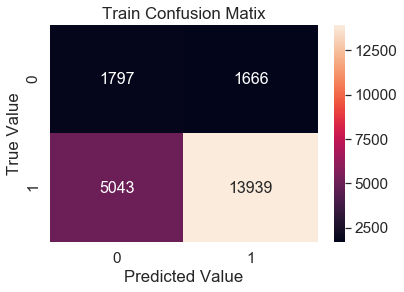

In [140]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds,
                                                                      train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

### Test Data

In [141]:
#This is Future Unseen Data
print("Test confusion matrix for Test Data")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix for Test Data
the maximum value of tpr*(1-fpr) 0.24915521413069439 for threshold 0.785
[[1347 1199]
 [4716 9238]]


the maximum value of tpr*(1-fpr) 0.24915521413069439 for threshold 0.785


Text(0.5,1,'Test Confusion Matix')

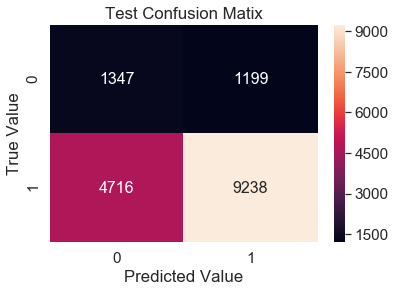

In [147]:
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## 2.4.3 Applying KNN brute force on AVG W2V_SET-3

In [148]:
#train_avg_w2v_vectors
X_train3 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot,train_avg_w2v_vectors, train_title_avg_w2v_vectors, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar)).tocsr()
X_test3 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_avg_w2v_vectors, test_title_avg_w2v_vectors, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar)).tocsr()
X_cv3 = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot, cv_avg_w2v_vectors, cv_title_avg_w2v_vectors, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar)).tocsr()
print(X_train3.shape, y_train.shape)
print(X_test3.shape, y_test.shape)
print(X_cv3.shape, y_cv.shape)

(22445, 703) (22445,)
(16500, 703) (16500,)
(11055, 703) (11055,)


100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [2:59:45<00:00, 1259.03s/it]


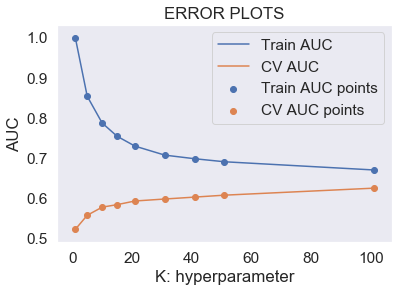

In [149]:
#train_avg_w2v_vectors
#test_avg_w2v_vectors
train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train3, y_train)

    y_train_pred = batch_predict(neigh, X_train3)    
    y_cv_pred = batch_predict(neigh, X_cv3)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Fitting Model to HyperParameter Curve


In [151]:
best_k_3 = 121
# The Highest value of K can neglect the noise and outliers

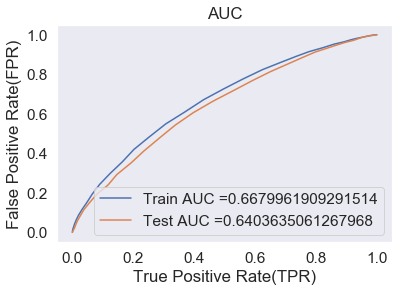

In [152]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_3)
neigh.fit(X_train3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train3)    
y_test_pred = batch_predict(neigh, X_test3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

In [153]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999080665379794 for threshold 0.835
[[ 1742  1721]
 [ 5208 13774]]


the maximum value of tpr*(1-fpr) 0.24999080665379794 for threshold 0.835


Text(0.5,1,'Train Confusion Matix')

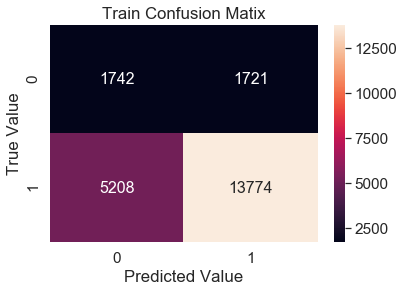

In [154]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds,
                                                                      train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

### Confusion Matrix for Test Data

In [155]:
#This is Future Unseen Data
print("Test confusion matrix for Test Data")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix for Test Data
the maximum value of tpr*(1-fpr) 0.24913222780956096 for threshold 0.835
[[ 1198  1348]
 [ 3944 10010]]


the maximum value of tpr*(1-fpr) 0.24913222780956096 for threshold 0.835


Text(0.5,1,'Test Confusion Matix')

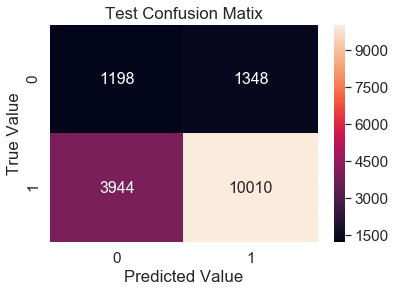

In [156]:
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## 2.4.4 Applying KNN brute force on TFIDF W2V_SET-4

In [160]:
X_train4 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot, train_essay_tfidf_w2v_vectors, train_title_tfidf_w2v_vectors, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar)).tocsr()
X_test4 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_essay_tfidf_w2v_vectors, test_title_tfidf_w2v_vectors, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar)).tocsr()
X_cv4 = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot, cv_essay_tfidf_w2v_vectors, cv_title_tfidf_w2v_vectors, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar)).tocsr()
print(X_train4.shape, y_train.shape)
print(X_test4.shape, y_test.shape)
print(X_cv4.shape, y_cv.shape)

(22445, 703) (22445,)
(16500, 703) (16500,)
(11055, 703) (11055,)


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [16:55<00:00, 92.52s/it]


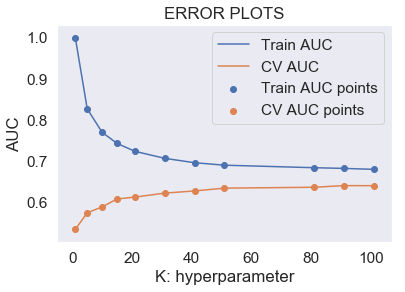

In [157]:
#train_essay_tfidf_w2v_vectors
#test_essay_tfidf_w2v_vectors
train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 81, 91, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train4, y_train)

    y_train_pred = batch_predict(neigh, X_train4)    
    y_cv_pred = batch_predict(neigh, X_cv4)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Fitting Model to HyperParameter Curve


In [158]:
best_k_4 = 121
# The Highest value of K can neglect the noise and outliers

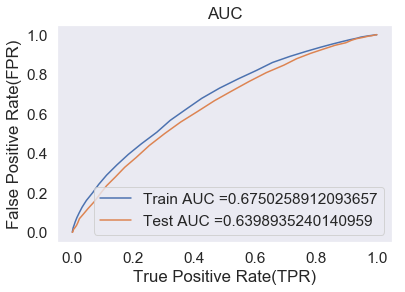

In [163]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_4)
neigh.fit(X_train1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train1)    
y_test_pred = batch_predict(neigh, X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



### Confusion Matrix

In [164]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24972430384688798 for threshold 0.777
[[ 1789  1674]
 [ 5137 13845]]


the maximum value of tpr*(1-fpr) 0.24972430384688798 for threshold 0.777


Text(0.5,1,'Train Confusion Matix')

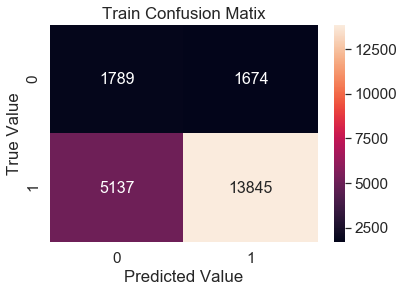

In [165]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds,
                                                                      train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

### Confusion Matix for Test Data

In [166]:
#This is Future Unseen Data
print("Test confusion matrix for Test Data")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix for Test Data
the maximum value of tpr*(1-fpr) 0.24946298400090341 for threshold 0.777
[[1214 1332]
 [3982 9972]]


the maximum value of tpr*(1-fpr) 0.24946298400090341 for threshold 0.777


Text(0.5,1,'Test Confusion Matix')

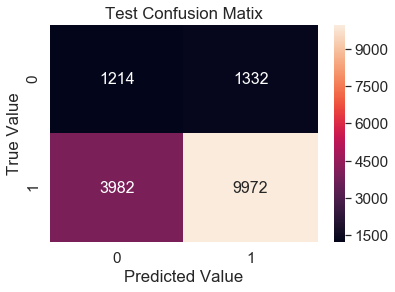

In [167]:
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [168]:
X_train2 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot,train_text_tfidf, train_title_tfidf, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar)).tocsr()
X_test2 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_text_tfidf, test_title_tfidf, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar)).tocsr()
X_cv2 = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot, cv_text_tfidf, cv_title_tfidf, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar)).tocsr()
print(X_train2.shape, y_train.shape)
print(X_test2.shape, y_test.shape)
print(X_cv2.shape, y_cv.shape)

(22445, 10026) (22445,)
(16500, 10026) (16500,)
(11055, 10026) (11055,)


In [199]:
##ValueError: Input X must be non-negative.
##https://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn

#from sklearn.datasets import load_digits
#X_train2, y_test = load_digits(return_X_y=True)
#y_test1 = y_test.iloc[0]
#print(type(y_train1))
#print(y_train1)
print(X_train2.shape, y_train.shape)

(22445, 10026) (22445,)


In [169]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

##ValueError: Input X must be non-negative.
##https://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn
X_train2_new = SelectKBest(f_classif, k=2000).fit_transform(X_train2, y_train)
X_test2_new = SelectKBest(f_classif, k=2000).fit_transform(X_test2, y_test)
X_cv2_new = SelectKBest(f_classif, k=2000).fit_transform(X_cv2, y_cv)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [11:12<00:00, 61.26s/it]


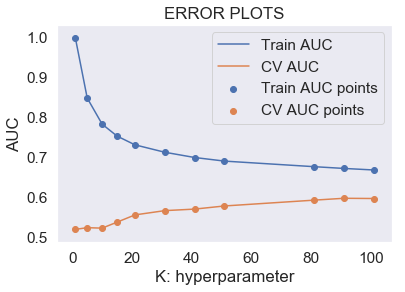

In [170]:
#train_essay_tfidf_w2v_vectors
#test_essay_tfidf_w2v_vectors
train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 81, 91, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train2_new, y_train)

    y_train_pred = batch_predict(neigh, X_train2_new)    
    y_cv_pred = batch_predict(neigh, X_cv2_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Fitting to HyperParameter

In [171]:
best_K_5 = 131

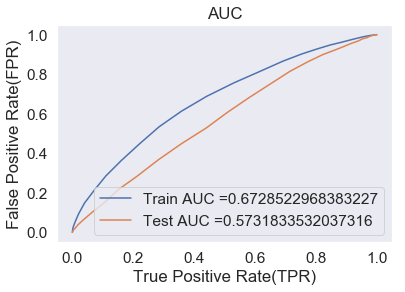

In [172]:
neigh = KNeighborsClassifier(n_neighbors=91)
neigh.fit(X_train2_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train2_new)    
y_test_pred = batch_predict(neigh, X_test2_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



### Confusion Matrix

In [173]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24901835492220095 for threshold 0.824
[[ 1623  1840]
 [ 4618 14364]]


the maximum value of tpr*(1-fpr) 0.24901835492220095 for threshold 0.824


Text(0.5,1,'Train Confusion Matix')

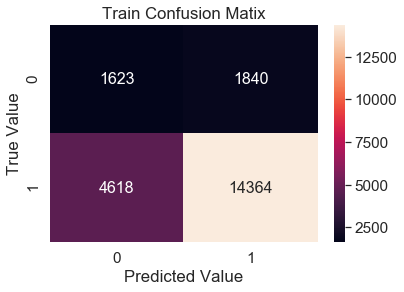

In [174]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds,
                                                                      train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

### Confusion Matirx on Test Data

In [175]:
#This is Future Unseen Data
print("Test confusion matrix for Test Data")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix for Test Data
the maximum value of tpr*(1-fpr) 0.24993196666026957 for threshold 0.835
[[1252 1294]
 [5501 8453]]


the maximum value of tpr*(1-fpr) 0.24993196666026957 for threshold 0.835


Text(0.5,1,'Test Confusion Matix')

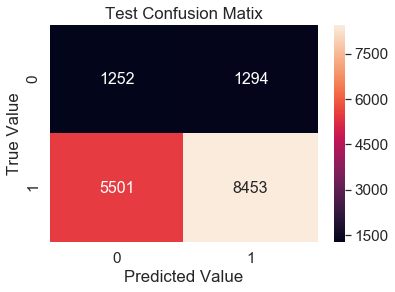

In [176]:
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## KNN on Balanced BOW

In [188]:
##https://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn
X_train1_new = SelectKBest(f_classif, k=2000).fit_transform(X_train1, y_train)
X_test1_new = SelectKBest(f_classif, k=2000).fit_transform(X_test1, y_test)
X_cv1_new = SelectKBest(f_classif, k=2000).fit_transform(X_cv1, y_cv)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [08:26<00:00, 56.72s/it]


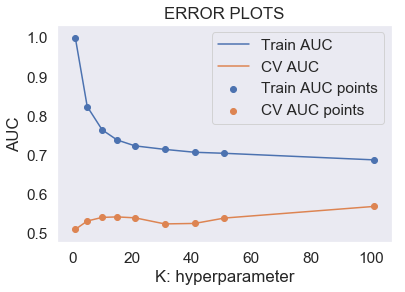

In [189]:
#train_avg_w2v_vectors
#test_avg_w2v_vectors
train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train1_new, y_train)

    y_train_pred = batch_predict(neigh, X_train1_new)    
    y_cv_pred = batch_predict(neigh, X_cv1_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



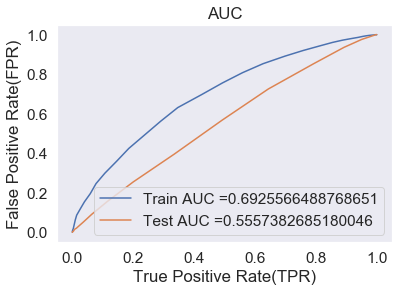

In [190]:
neigh = KNeighborsClassifier(n_neighbors=91)
neigh.fit(X_train2_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train2_new)    
y_test_pred = batch_predict(neigh, X_test2_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24995394988262953 for threshold 0.758
[[ 1755  1708]
 [ 4632 14350]]
the maximum value of tpr*(1-fpr) 0.24995394988262953 for threshold 0.758


Text(0.5,1,'Train Confusion Matix')

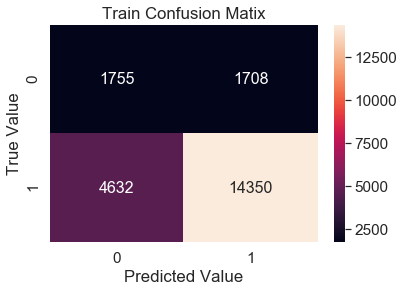

In [191]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds,
                                                                      train_fpr,train_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Train Confusion Matix")

Test confusion matrix for Test Data
the maximum value of tpr*(1-fpr) 0.24992533302396935 for threshold 0.769
[[ 2492    54]
 [13506   448]]
the maximum value of tpr*(1-fpr) 0.24992533302396935 for threshold 0.769


Text(0.5,1,'Test Confusion Matix')

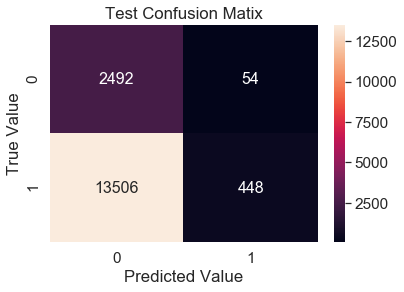

In [192]:
#This is Future Unseen Data
print("Test confusion matrix for Test Data")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(test_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

<h1>3. Conclusions</h1>

In [177]:
# Please compare all your models using Prettytable library
#how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

tb = PrettyTable()
tb.field_names= ("Vectorizer", "Model", "HyperParameter", "AUC")
tb.add_row(["BOW", "Auto", 97, 63])
tb.add_row(["Tf-Idf", "Auto", 107, 65])
tb.add_row(["AVG-W2v", "Auto", 121, 64])
tb.add_row(["Tf-Idf W2v", "Auto", 121, 64])
tb.add_row(["Tf-Idf KBest", "Auto", 91, 57])
print(tb.get_string(titles = "KNN - Observations"))
#print(tb)

+--------------+-------+----------------+-----+
|  Vectorizer  | Model | HyperParameter | AUC |
+--------------+-------+----------------+-----+
|     BOW      |  Auto |       97       |  63 |
|    Tf-Idf    |  Auto |      107       |  65 |
|   AVG-W2v    |  Auto |      121       |  64 |
|  Tf-Idf W2v  |  Auto |      121       |  64 |
| Tf-Idf KBest |  Auto |       91       |  57 |
+--------------+-------+----------------+-----+
